# Human Resources Analytics

### Objectives
There are many problems in HR that can be addressed using data-driven approach. Among those are decisions related to employee hiring and retention, performance evaluation, collaboration and many more. In this notebook, we will explore and predict employee turnover based on hiring and retention. Employee turnover is the process of employees leaving the company also known as employee attrition or employee churn. When skilled employees leave, this can be very costly for the company, thus firms are interested in predicting turnover beforehand. Having that information in hand, companies can change their strategy to retain good workers or start the hiring process of new employees on time. It will consist of the following steps:
1. Descriptive Analytics 
2. Develop the Initial Model 
3. Optimization
4. Best Model Selection

In [5]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt



In [3]:
# load the dataset
hr_df = pd.read_csv('datasets/2customer_churn.csv')
print(hr_df.head(3))
hr_df.info()

   satisfaction  evaluation  number_of_projects  average_montly_hours  \
0          0.38        0.53                   2                   157   
1          0.80        0.86                   5                   262   
2          0.11        0.88                   7                   272   

   time_spend_company  work_accident  churn  promotion department  salary  
0                   3              0      1          0      sales     low  
1                   6              0      1          0      sales  medium  
2                   4              0      1          0      sales  medium  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-nu

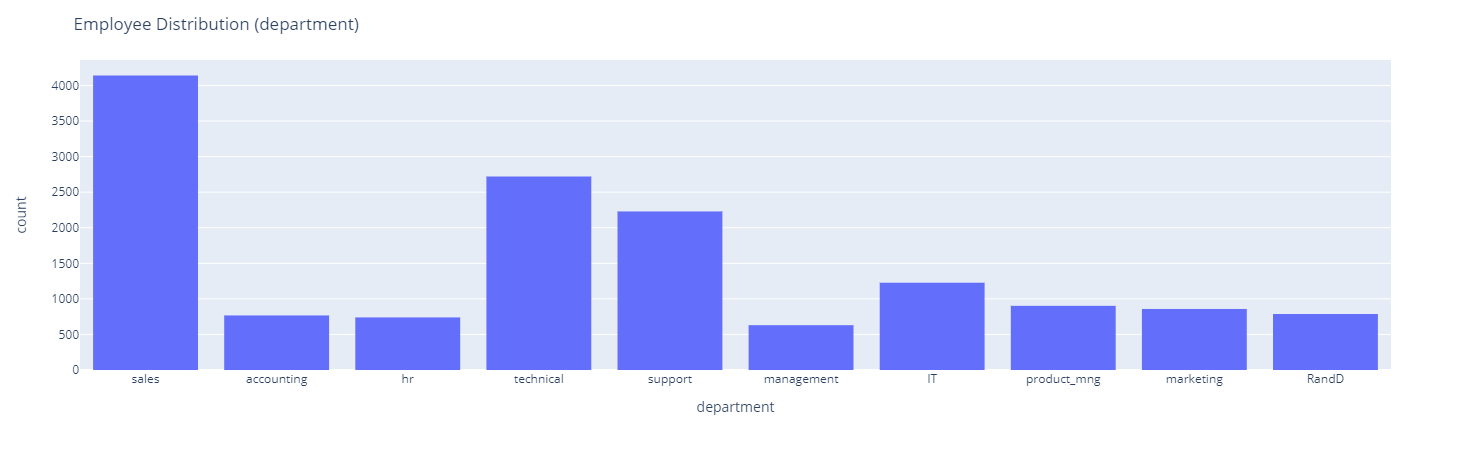

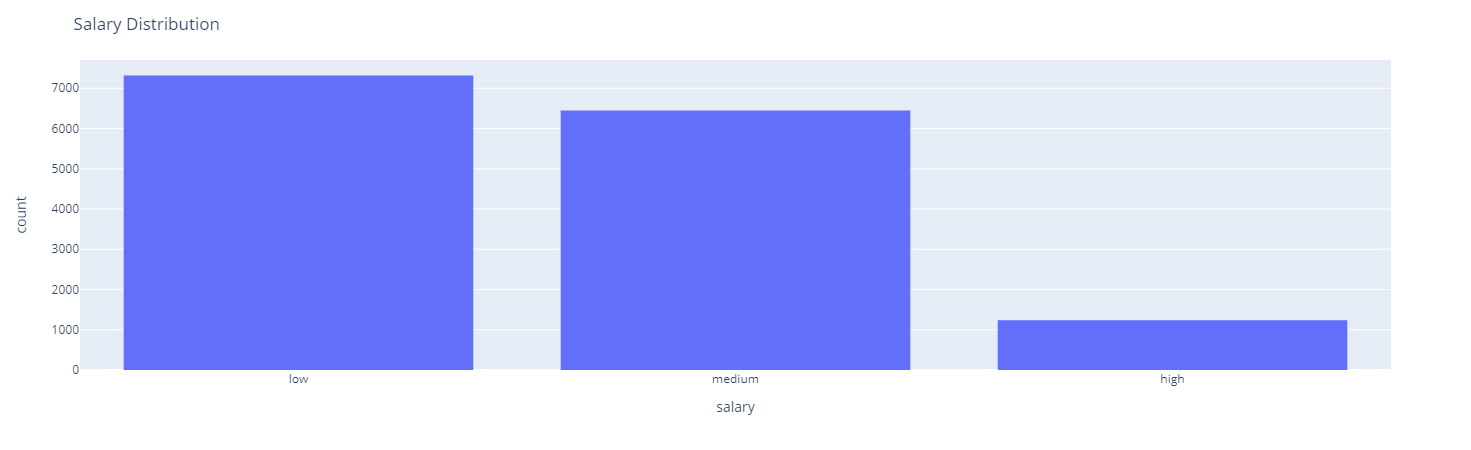

In [10]:
fig = px.histogram(hr_df, x='department')
fig.update_layout(title_text='Employee Distribution (department)')
fig.show()

fig = px.histogram(hr_df, x='salary')
fig.update_layout(title_text='Salary Distribution')
fig.show()

In [15]:
hr_df['department'][(hr_df['salary']) == 'low'].value_counts()

sales          2099
technical      1372
support        1146
IT              609
product_mng     451
marketing       402
RandD           364
accounting      358
hr              335
management      180
Name: department, dtype: int64

In [19]:
# transforming categorical variables 
hr_df.salary = hr_df.salary.astype('category')
# provide the correct order of categories
hr_df.salary = hr_df.salary.cat.reorder_categories(['low', 'medium', 'high'])

# encode categories with integer values
hr_df.salary = hr_df.salary.cat.codes


ValueError: items in new_categories are not the same as in old categories

In [22]:
hr_df

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0
14995,0.37,0.48,2,160,3,0,1,0,support,0
14996,0.37,0.53,2,143,3,0,1,0,support,0
14997,0.11,0.96,6,280,4,0,1,0,support,0
